In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import calendar
from datetime import datetime

from mpl_toolkits.basemap import Basemap

In [2]:
dfZP = pd.read_csv('../data/train.csv')

In [3]:
dfZP.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
dfZP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

# Verificación de datos

In [5]:
dfZP.shape

(240000, 23)

In [6]:
#Verificamos datos
print(dfZP['ciudad'].unique())

['Benito Juárez' 'La Magdalena Contreras' 'Tonalá' 'Zinacantepec'
 'Zapopan' 'Coyoacán' 'Oaxaca de Juárez' 'Playa del Carmen'
 'Villa de Alvarez' 'Ixtapaluca' 'San Luis Potosí'
 'San Pedro Garza García' 'Querétaro' 'Naucalpan de Juárez' 'Monterrey'
 'Ciudad Madero' 'Cancún' 'Apodaca' 'Puebla' 'Miguel Hidalgo' 'Mérida'
 'Huixquilucan' 'Emiliano Zapata' 'Tampico' 'Atizapán de Zaragoza'
 'Tlalpan' 'Acapulco de Juárez' 'Iztacalco' 'Villahermosa'
 'Cuautitlán Izcalli' 'Irapuato' 'Epazoyucan' 'Metepec' 'Cuauhtémoc'
 'Alvaro Obregón' 'Tultitlán' 'San Pedro Cholula' 'Venustiano Carranza'
 'Coacalco de Berriozábal' 'Valle de Bravo' 'Boca del Río'
 'Tlajomulco de Zúñiga' 'León' 'San Andrés Cholula' 'Chihuahua'
 'San Nicolás de los Garza' 'Santa Catarina' 'Aguascalientes' 'Cuernavaca'
 'Xochimilco' 'Tlalnepantla de Baz' 'Tequisquiapan' 'Hermosillo'
 'Montemorelos' 'Milpa Alta' 'Gustavo A. Madero' 'Morelia' 'Tijuana'
 'Jesús María' 'Guadalajara' 'La Paz' 'Chapala' 'Cuajimalpa de Morelos'
 'Delicia

In [7]:
#Verificamos datos
print(dfZP['provincia'].unique())

['Distrito Federal' 'Jalisco' 'Edo. de México' 'Oaxaca' 'Quintana Roo'
 'Colima' 'San luis Potosí' 'Nuevo León' 'Querétaro' 'Tamaulipas' 'Puebla'
 'Yucatán' 'Morelos' 'Guerrero' 'Tabasco' 'Guanajuato' 'Hidalgo'
 'Veracruz' 'Chihuahua' 'Aguascalientes' 'Sonora' 'Michoacán'
 'Baja California Norte' 'Baja California Sur' 'Coahuila' 'Durango'
 'Sinaloa' 'Chiapas' 'Nayarit' 'Tlaxcala' 'Campeche' 'Zacatecas' nan]


In [8]:
#Verificamos que el set de datos corresponde al periodo del 1/1/2012 al 31/12/2016
dfZP['fecha'].min()

'2012-01-01 00:00:00'

In [9]:
dfZP['fecha'].max()

'2016-12-31 00:00:00'

In [10]:
dfZP['antiguedad'].unique()

array([nan, 10.,  5.,  1.,  2.,  0., 20.,  4.,  8.,  3., 18., 16.,  6.,
       50., 30., 26., 25., 28., 15., 12., 48., 22., 11., 60., 17., 33.,
       35., 14., 40.,  7.,  9., 27., 24., 19., 34., 13., 37., 36., 65.,
       31., 21., 23., 45., 32., 51., 29., 42., 43., 49., 70., 44., 46.,
       39., 38., 47., 63., 55., 52., 41., 80., 59., 67., 54., 71., 58.,
       75., 53., 61., 79., 69., 56., 66., 57., 62., 64., 74., 77., 76.,
       68.])

In [11]:
dfZP['banos'].unique()

array([ 2.,  1.,  3., nan,  4.])

In [12]:
dfZP['habitaciones'].unique()

array([ 2.,  3.,  4., nan,  5.,  1.,  9.,  7., 10.,  6.,  8.])

In [13]:
dfZP['garages'].unique()

array([ 1.,  2., nan,  0.,  3.])

In [14]:
dfZP['escuelascercanas'].unique()

array([0., 1.])

In [15]:
dfZP['centroscomercialescercanos'].unique()

array([0., 1.])

In [16]:
dfZP['gimnasio'].unique()

array([0., 1.])

In [17]:
dfZP['usosmultiples'].unique()

array([0., 1.])

In [18]:
dfZP['piscina'].unique()

array([0., 1.])

# Datos faltantes 

In [19]:
nulls = pd.DataFrame(dfZP.isnull().sum().sort_values(ascending=False), columns=['nulls'])

nulls['porcentaje'] = round(100*nulls['nulls'] / len(dfZP), 2)
nulls

,nulls,porcentaje
lng,123488,51.45
lat,123488,51.45
direccion,53072,22.11
metrostotales,51467,21.44
antiguedad,43555,18.15
garages,37765,15.74
idzona,28621,11.93
banos,26221,10.93
habitaciones,22471,9.36
metroscubiertos,17400,7.25


# Transformacion de datos del DataFrame

In [20]:
(dfZP.memory_usage() / (1024 * 1024)).sum()

42.1143798828125

In [21]:
# Baños, habitaciones y garages Nan se setean a 0
# Antiguedad no será transformado a int y sus nulls serán tratados posteriomente para un analisis en particular
dfZP['banos'] = dfZP['banos'].fillna(0)
dfZP['habitaciones'] = dfZP['habitaciones'].fillna(0)
dfZP['garages'] = dfZP['garages'].fillna(0)

In [22]:
dfZP.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [23]:
#Transformo tipo de datos
dfZP['tipodepropiedad'] = dfZP['tipodepropiedad'].astype('category')
dfZP['direccion'] = dfZP['direccion'].astype('category')
dfZP['ciudad'] = dfZP['ciudad'].astype('category')
dfZP['provincia'] = dfZP['provincia'].astype('category')
dfZP['precio'] = dfZP['precio'].astype(int)
dfZP['banos'] = dfZP['banos'].astype(int)
dfZP['habitaciones'] = dfZP['habitaciones'].astype(int)
dfZP['garages'] = dfZP['garages'].astype(int)
dfZP['escuelascercanas'] = dfZP['escuelascercanas'].astype(int)
dfZP['centroscomercialescercanos'] = dfZP['centroscomercialescercanos'].astype(int)
dfZP['gimnasio'] = dfZP['gimnasio'].astype(int)
dfZP['usosmultiples'] = dfZP['usosmultiples'].astype(int)
dfZP['piscina'] = dfZP['piscina'].astype(int)
dfZP['fecha'] = pd.to_datetime(dfZP['fecha'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
dfZP['fecha_YYYYMMDD'] = pd.to_datetime(dfZP['fecha'], format='%Y-%m-%d', errors='coerce')
dfZP['fecha_YYYY'] = pd.DatetimeIndex(dfZP['fecha']).year.astype(int)
dfZP['fecha_MM'] = pd.DatetimeIndex(dfZP['fecha']).month.astype(int)
dfZP['fecha_DD'] = pd.DatetimeIndex(dfZP['fecha']).day.astype(int)
dfZP['fecha_dayofyear'] = dfZP['fecha'].dt.dayofyear.astype('category')
dfZP['fecha_dayofweek'] = dfZP['fecha'].dt.dayofweek.astype('category')
dfZP['fecha_day_name'] = dfZP['fecha'].dt.day_name().astype('category')
dfZP['fecha_month_name'] = dfZP['fecha'].dt.month_name().astype('category')

In [24]:
dfZP.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                           category
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                           int32
garages                                int32
banos                                  int32
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                               int32
usosmultiples                          int32
piscina                                int32
escuelascercanas                       int32
centroscomercialescercanos             int32
precio    

In [25]:
dfZP.fecha_YYYY.unique()

array([2015, 2013, 2012, 2016, 2014], dtype=int64)

In [26]:
dfZP.fecha_MM.unique()

array([ 8,  6, 10,  3,  2,  1, 12, 11,  5,  9,  7,  4], dtype=int64)

In [27]:
dfZP.fecha_day_name.unique()

[Sunday, Friday, Saturday, Tuesday, Thursday, Monday, Wednesday]
Categories (7, object): [Sunday, Friday, Saturday, Tuesday, Thursday, Monday, Wednesday]

In [28]:
dfZP.fecha_month_name.unique()

[August, June, October, March, February, ..., November, May, September, July, April]
Length: 12
Categories (12, object): [August, June, October, March, ..., May, September, July, April]

In [29]:
dfZP.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,centroscomercialescercanos,precio,fecha_YYYYMMDD,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name,fecha_month_name
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2,1,...,0,2273000,2015-08-23,2015,8,23,235,6,Sunday,August
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3,2,...,1,3600000,2013-06-28,2013,6,28,179,4,Friday,June
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3,2,...,0,1200000,2015-10-17,2015,10,17,290,5,Saturday,October
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2,1,...,1,650000,2012-03-09,2012,3,9,69,4,Friday,March
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2,1,...,0,1150000,2016-06-07,2016,6,7,159,1,Tuesday,June


In [30]:
dfZP.memory_usage()

Index                             128
id                            1920000
titulo                        1920000
descripcion                   1920000
tipodepropiedad                240832
direccion                     7325032
ciudad                         527960
provincia                      241536
antiguedad                    1920000
habitaciones                   960000
garages                        960000
banos                          960000
metroscubiertos               1920000
metrostotales                 1920000
idzona                        1920000
lat                           1920000
lng                           1920000
fecha                         1920000
gimnasio                       960000
usosmultiples                  960000
piscina                        960000
escuelascercanas               960000
centroscomercialescercanos     960000
precio                         960000
fecha_YYYYMMDD                1920000
fecha_YYYY                    1920000
fecha_MM    

In [31]:
(dfZP.memory_usage() / (1024 * 1024)).sum()

42.98193359375

Aquí vemos que a pesar de haber agregado 8 columnas, con la transformación de datos logramos mantener el uso de memoria inicial

# Correlación entre Antiguedad y Precio

In [39]:
dfZP2 = dfZP.dropna(subset=['antiguedad']).copy()
dfZP2['antiguedad'] = dfZP2['antiguedad'].astype(int)
dfZP2['antiguedad'].unique()

array([10,  5,  1,  2,  0, 20,  4,  8,  3, 18, 16,  6, 50, 30, 26, 25, 28,
       15, 12, 48, 22, 11, 60, 17, 33, 35, 14, 40,  7,  9, 27, 24, 19, 34,
       13, 37, 36, 65, 31, 21, 23, 45, 32, 51, 29, 42, 43, 49, 70, 44, 46,
       39, 38, 47, 63, 55, 52, 41, 80, 59, 67, 54, 71, 58, 75, 53, 61, 79,
       69, 56, 66, 57, 62, 64, 74, 77, 76, 68], dtype=int64)

In [41]:
dfZP_GBy_antiguedad = dfZP2.groupby('antiguedad').agg({'precio': ['mean', 'count']})
dfZP_GBy_antiguedad.columns = ['precio_promedio', 'total_muestra']
dfZP_GBy_antiguedad['precio_promedio'] = round(dfZP_GBy_antiguedad.precio_promedio, 2)
dfZP_GBy_antiguedad

,precio_promedio,total_muestra
antiguedad,,
0,2478478.97,50335
1,2635362.52,12353
2,2790816.37,5059
3,2616412.59,5616
4,2562077.38,7944
...,...,...
75,3983333.33,6
76,10000000.00,2
77,869677.00,1


In [42]:
#Eliminamos las filas con menos de  20 muestras
dfZP_GBy_antiguedad = dfZP_GBy_antiguedad.loc[dfZP_GBy_antiguedad.total_muestra > 20] 
dfZP_GBy_antiguedad.precio_promedio.max()

4124333.33

In [43]:
dfZP_GBy_antiguedad

,precio_promedio,total_muestra
antiguedad,,
0,2478478.97,50335
1,2635362.52,12353
2,2790816.37,5059
3,2616412.59,5616
4,2562077.38,7944
5,2374731.74,33268
6,2214881.99,3169
7,2141595.38,2046
8,2050722.53,2418


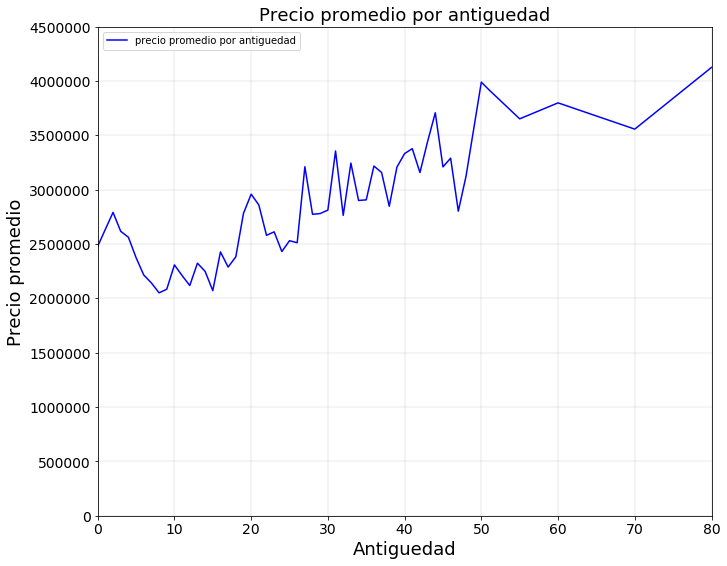

In [44]:
dfZP_GBy_antiguedad['precio_promedio'].plot(rot=0,figsize=(11,9),color='Blue', fontsize=14,x_compat=True, ylim=(0, 4500000))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Precio promedio por antiguedad',fontsize=18);
plt.ylabel('Precio promedio',fontsize=18);
plt.xlabel('Antiguedad',fontsize=18);
plt.legend(['precio promedio por antiguedad'], loc='upper left');

plt.show()

Podemos observar una distribución pareja del precio entre las propiedades con antiguedad de 0 a 25 años, luego el promedio tiende a subir.

# Publicaciones por mes y año - OPC 2

In [45]:
for_heatmap = dfZP.pivot_table(index='fecha_YYYY', columns='fecha_MM', values='id', aggfunc='count')
for_heatmap

fecha_MM,1,2,3,4,5,6,7,8,9,10,11,12
fecha_YYYY,,,,,,,,,,,,
2012,1528,1327,1103,1434,1857,1524,1973,3971,2598,3161,1608,1450
2013,1993,1401,1734,1829,2000,2016,2524,2374,3321,4056,4012,3126
2014,2403,2534,2916,2780,3071,3082,3125,3583,3911,3811,4613,4743
2015,4310,3869,3957,3783,3696,3804,3875,4526,4863,5552,4906,4329
2016,5775,4592,5022,6640,5438,6795,6013,6443,5929,6726,6086,28579


Text(33.0, 0.5, 'Año')

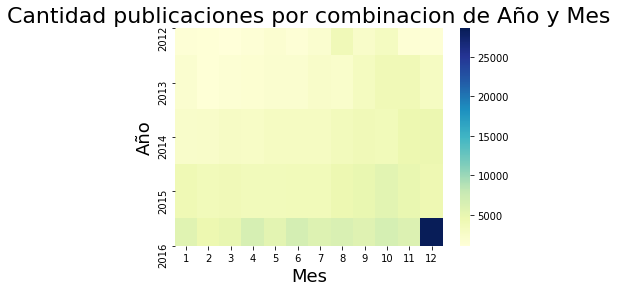

In [46]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Cantidad publicaciones por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

No es de mucha utilidad pero sirve para ver el crecimiento de publicaciones en 2016 y el boom de publicaciones en Dic-2016